In [156]:
#import libraries

import pandas as pd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for scaling
from sklearn.preprocessing import scale

# for KMeans clustering 
from sklearn.cluster import KMeans

#for hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [157]:
country_data = pd.read_csv('F:\\UpGrad\\Module_2\\Assignment_Clustering\\Country-data.csv')
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [158]:
# Let's preserve the ID column to some variable, so that we can make use of it later after perfroming PCA
Country = country_data['country']
print(Country.head())

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object


In [159]:
data1 = country_data.drop(['country'],axis =1)
data1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Converting exports, imports and health percentage to absolute values according to their GDP per capita. 

In [160]:
data1['exports'] = data1['exports'] * data1['gdpp']/100 
data1['imports'] = data1['imports'] * data1['gdpp']/100 
data1['health'] = data1['health'] * data1['gdpp']/100 

In [161]:
data1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [162]:
data1.shape

(167, 9)

In [163]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2)
memory usage: 11.8 KB


# Data Cleaning

In [164]:
data1.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

From the above data we saw that our data is clean, the next step is to check the correlation between the variables so that we can do dimensionality reduction on the dataset by applying PCA.

# Data Preperation

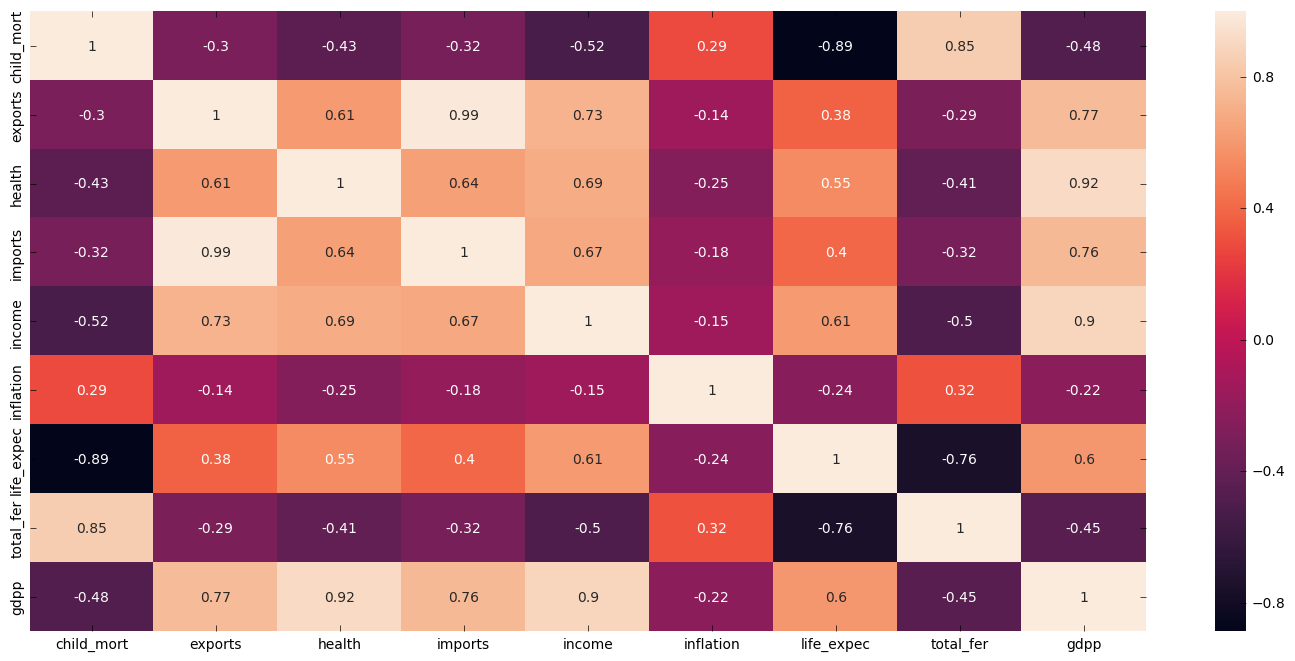

In [165]:
plt.figure(figsize = (18,8))
sns.heatmap(data1.corr(),annot = True)

In [166]:
# Let's check the info about the data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2)
memory usage: 11.8 KB


In [167]:
# Rescale the variable so that PCA can be applied
from sklearn.preprocessing import StandardScaler
standardScalar = StandardScaler()
data2 = standardScalar.fit_transform(data1)
data2.max()

9.839814177922182

# PCA

In [168]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized', random_state =  42)
pca.fit(data2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [169]:
# PCA components. It should be same as number of variables
pca.components_[0][0]

-0.31639186120080504

In [170]:
# Variance Ratio
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

## Scree Plot

<function matplotlib.pyplot.show>

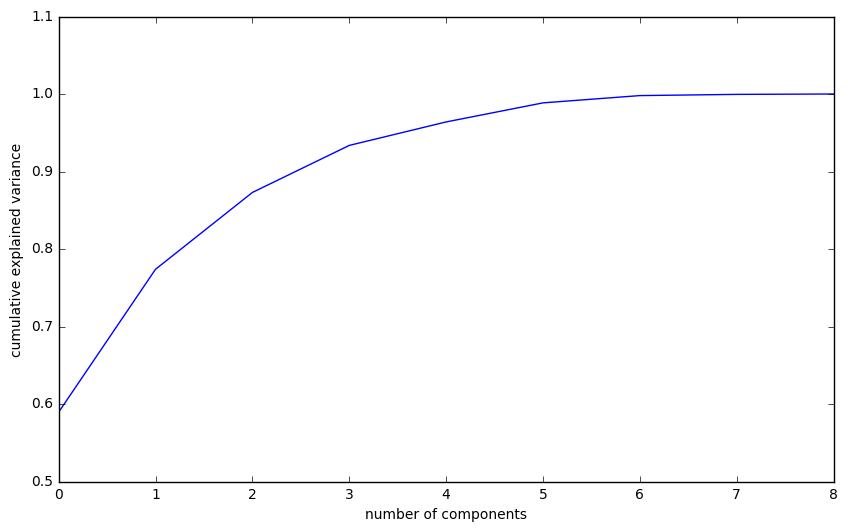

In [171]:
# Plotting the cumulative variance against the number of components
%matplotlib inline
figure = plt.figure(figsize = (10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show

Over 90% of the data is properly explained by the first 3 principle components

In [172]:
# Checking first 3 components
column_names = list(country_data.drop('country',axis = 1).columns)
pca_df = pd.DataFrame({'Feature': column_names, 'PCA1' : pca.components_[0], 'PCA2': pca.components_[1], 
                       'PCA3' : pca.components_[2]})
pca_df

,Feature,PCA1,PCA2,PCA3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


We will plot them to check which variables are well explained by these 3 components.We will only use the first two PCA and check their variance.

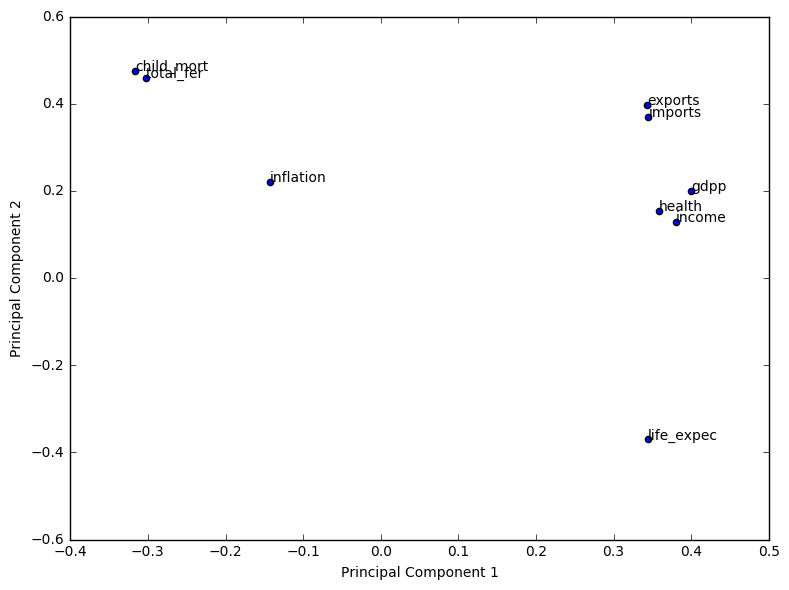

In [173]:
# Visualizing the first two components
%matplotlib inline
figure = plt.figure(figsize = (8,6))
plt.scatter(pca_df.PCA1, pca_df.PCA2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i,y in enumerate(pca_df.Feature):
    plt.annotate(y, (pca_df.PCA1[i],pca_df.PCA2[i]))
plt.tight_layout()
plt.show()

Many of the variables have a good loading score on the 1st principal component. While child mortality and total fertility is well explained by the 2nd principal component

In [174]:
# We are now using incremental PCA for efficiency which is saving a lot of time.

In [175]:
from sklearn.decomposition import IncrementalPCA
final_pca = IncrementalPCA(n_components = 3)

In [176]:
train_pca = final_pca.fit_transform(data2)
train_pca.shape

(167, 3)

In [177]:
# Transpose of PCA matrix to create a new matrix
pcs =  np.transpose(train_pca)
pcs

array([[-2.63744157e+00, -2.22769569e-02, -4.57626261e-01,
        -2.72452030e+00,  6.49848516e-01,  3.71968554e-02,
        -3.32691520e-01,  3.18036154e+00,  3.81568156e+00,
        -4.67515152e-01,  1.49875246e+00,  1.47097104e+00,
        -1.01419903e+00,  8.45238116e-01, -1.34473920e-02,
         3.96087770e+00, -4.02707071e-01, -2.36598657e+00,
        -7.14998191e-01, -1.01778054e+00,  2.52812687e-01,
        -1.13095912e+00,  1.66280202e-01,  2.69525065e+00,
         2.80569006e-01, -2.75387449e+00, -2.76406823e+00,
        -1.17929406e+00, -2.44142939e+00,  3.39411994e+00,
        -5.23229456e-01, -3.24153046e+00, -3.18889212e+00,
         6.92394286e-01, -1.28851026e-01, -1.38822916e-02,
        -1.94991207e+00, -3.11679859e+00, -2.04776384e+00,
         4.31523541e-01, -2.57476033e+00,  8.46278142e-01,
         2.31379384e+00,  1.67463303e+00,  4.37600084e+00,
        -3.67788028e-01, -3.02658561e-01, -8.36646810e-01,
        -3.36572123e-01, -1.05577406e+00, -1.94848965e+0

In [178]:
# Creating a new matrix according to the given principal components
rownames = list(country_data['country'])
pca_df2 = pd.DataFrame({'country' : rownames, 'PCA1' : pcs[0], 'PCA2' : pcs[1], 'PCA3' : pcs[2]})
pca_df2.head()

,PCA1,PCA2,PCA3,country
0,-2.637442,1.469038,-0.541359,Afghanistan
1,-0.022277,-1.431896,-0.020701,Albania
2,-0.457626,-0.673301,0.961867,Algeria
3,-2.724520,2.174583,0.606687,Angola
4,0.649849,-1.024374,-0.250103,Antigua and Barbuda


### Outlier Analysis

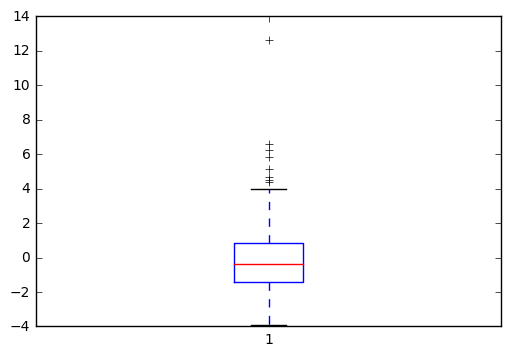

In [179]:
plt.boxplot(pca_df2.PCA1)
Q1 = pca_df2.PCA1.quantile(0.05)
Q3 = pca_df2.PCA1.quantile(0.95)
IQR = Q3 - Q1
pca_df2 = pca_df2[(pca_df2.PCA1 >= Q1) & (pca_df2.PCA1 <= Q3)]

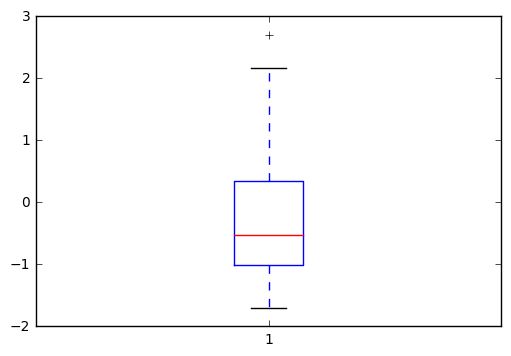

In [180]:
plt.boxplot(pca_df2.PCA2)
Q1 = pca_df2.PCA2.quantile(0.05)
Q3 = pca_df2.PCA2.quantile(0.95)
IQR = Q3 - Q1
pca_df2 = pca_df2[(pca_df2.PCA2 >= Q1) & (pca_df2.PCA2 <= Q3)]

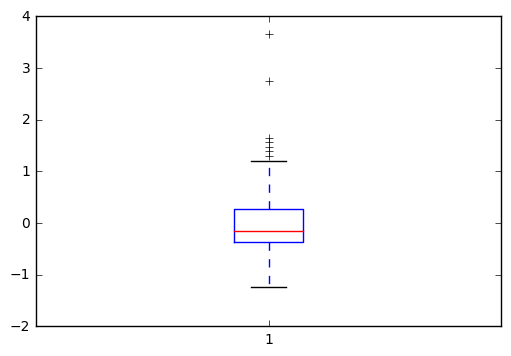

In [181]:
plt.boxplot(pca_df2.PCA3)
Q1 = pca_df2.PCA3.quantile(0.05)
Q3 = pca_df2.PCA3.quantile(0.95)
IQR = Q3 - Q1
pca_df2 = pca_df2[(pca_df2.PCA3 >= Q1) & (pca_df2.PCA3 <= Q3)]

In [182]:
pca_df2.shape

(119, 4)

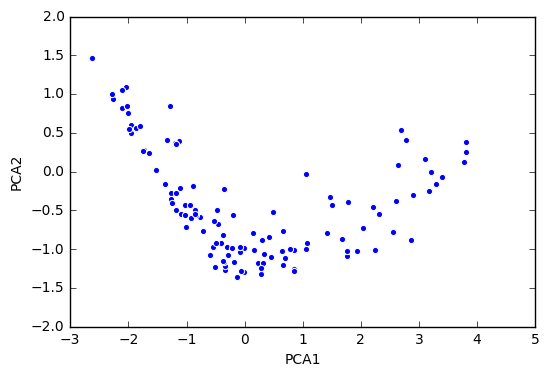

In [183]:
sns.scatterplot(x = 'PCA1', y = 'PCA2', data = pca_df2)

# Clustering

In [184]:
# Calculating the Hopkins statistic to ensure that the data is good for clustering.
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [185]:
hopkins(pca_df2.drop(['country'],axis = 1))

0.7789413042316645

0.74 is a good hopkins score hence the data is suitable for clustering. Now we can do standardization again.

In [186]:
data3 = pca_df2
data3_1 = standardScalar.fit_transform(data3.drop(['country'], axis = 1))

### K-means Clustering

In [187]:
# Checking silhouette score first to identify the ideal number of clusters
from sklearn.metrics import silhouette_score
s_sc = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(data3_1)
    s_sc.append([k,silhouette_score(data3_1,kmeans.labels_)])

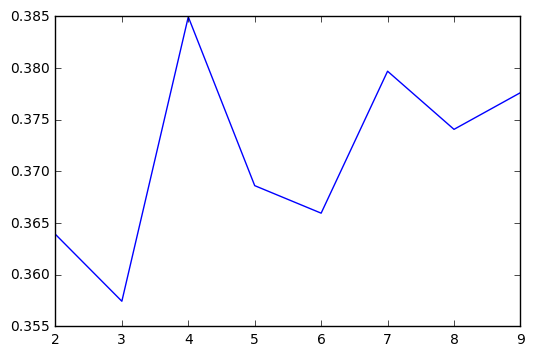

In [188]:
plt.plot(pd.DataFrame(s_sc)[0],pd.DataFrame(s_sc)[1])

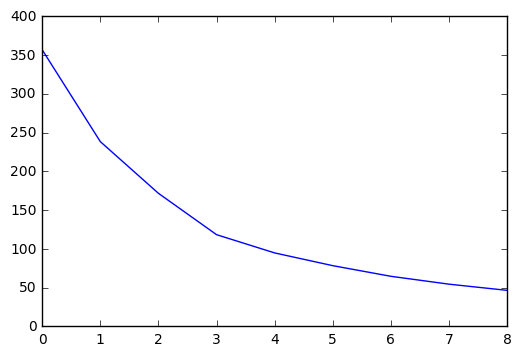

In [189]:
# The silhoutte score reaches a peak at around 5 clusters indicating  that it might be the ideal number of clusters
# Using the elbow curve method to identify the ideal number of clusters
ssd = []
for clusters in list(range(1,10)):
    model_cluster = KMeans(n_clusters = clusters, max_iter = 50)
    model_cluster.fit(data3_1)
    ssd.append(model_cluster.inertia_)
plt.plot(ssd)

### KMeans with 5 clusters

In [190]:
model_cluster5 = KMeans(n_clusters = 5, max_iter = 50)
model_cluster5.fit(data3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [191]:
data4 = data3
data4.index = pd.RangeIndex(len(data4.index))
data_new = pd.concat([data4,pd.Series(model_cluster5.labels_)], axis =1)
data_new.columns = [ 'PCA1','PCA2','PCA3','country','ClusterID']
data_new.head()

,PCA1,PCA2,PCA3,country,ClusterID
0,-2.637442,1.469038,-0.541359,Afghanistan,4
1,-0.457626,-0.673301,0.961867,Algeria,3
2,0.649849,-1.024374,-0.250103,Antigua and Barbuda,0
3,-0.332692,-1.274517,0.176636,Armenia,0
4,3.180362,-0.250785,-0.116877,Australia,2


In [192]:
data_new['ClusterID'].value_counts()

0    54
2    21
4    19
3    17
1     8
Name: ClusterID, dtype: int64

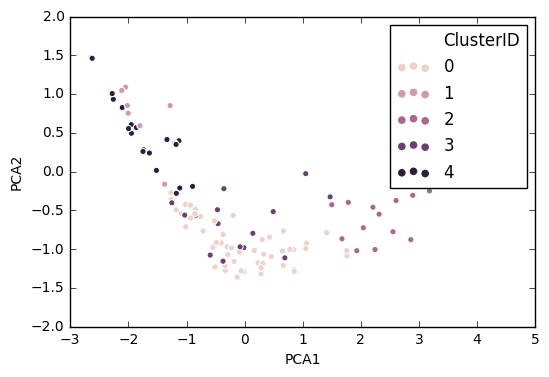

In [193]:
#Each cluster has a good number of countries associated.
#Visualizing the clusters on the original principal components
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'ClusterID', legend = 'full', data = data_new )

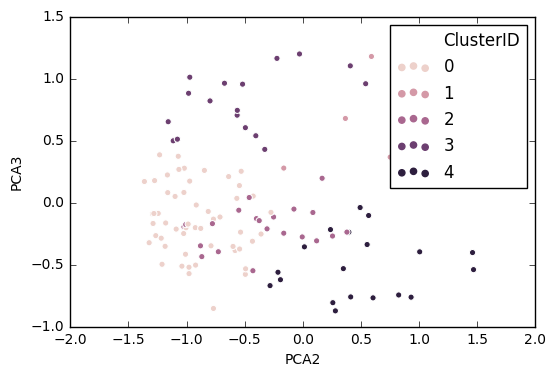

In [194]:
sns.scatterplot(x = 'PCA2', y = 'PCA3', hue = 'ClusterID', legend = 'full', data = data_new )

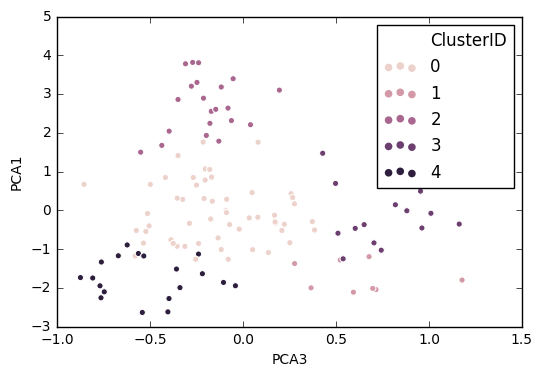

In [195]:
sns.scatterplot(x = 'PCA3', y = 'PCA1', hue = 'ClusterID', legend = 'full', data = data_new )

### Cluster creation

In [196]:
# Creating a cluster means with respect to the various variables mentioned.
data5 = pd.merge(country_data,data_new, on = 'country')
data6 = data5[['country', 'child_mort', 'exports', 'imports', 'health', 'income', 'inflation','life_expec',
              'total_fer','gdpp','ClusterID']]
cluster_child_mort = pd.DataFrame(data6.groupby(["ClusterID"]).child_mort.mean())
cluster_exports = pd.DataFrame(data6.groupby(["ClusterID"]).exports.mean())
cluster_imports = pd.DataFrame(data6.groupby(["ClusterID"]).imports.mean())
cluster_health = pd.DataFrame(data6.groupby(["ClusterID"]).health.mean())
cluster_income = pd.DataFrame(data6.groupby(["ClusterID"]).income.mean())
cluster_inflation = pd.DataFrame(data6.groupby(["ClusterID"]).inflation.mean())
cluster_life_expec = pd.DataFrame(data6.groupby(["ClusterID"]).life_expec.mean())
cluster_total_fer = pd.DataFrame(data6.groupby(["ClusterID"]).total_fer.mean())
cluster_gdpp = pd.DataFrame(data6.groupby(["ClusterID"]).gdpp.mean())

df = pd.concat([pd.Series([0,1,2,3,4]),cluster_child_mort,cluster_exports,cluster_imports,cluster_health,cluster_income,
                cluster_inflation,cluster_life_expec,cluster_total_fer,cluster_gdpp], axis =1)
df.columns = ["Cluster ID", "Child Mortality", "Exports", "Imports", "Health_Spending", "Income", "Inflation",
              "Life_Expectancy","Total_Fretility","GDPpcapita"]


df

,Cluster ID,Child Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fretility,GDPpcapita
0,0,21.327778,41.272389,49.862331,6.259630,12019.629630,4.389981,73.307407,2.276296,6915.592593
1,1,65.250000,40.875000,40.625000,5.185000,6203.750000,18.137500,65.537500,4.487500,2753.500000
2,2,4.795238,41.419048,41.576190,9.830476,35566.666667,1.147381,80.376190,1.759048,37209.523810
3,3,19.964706,47.616471,39.123529,4.984118,23580.588235,13.935294,72.976471,2.145882,11205.411765
4,4,65.084211,28.015263,46.684211,6.708947,3983.157895,6.446842,61.657895,4.266842,2025.947368


#### Observation:We observed that the Child_Mortality, Income, Inflation and GDP per capita are good predictors for the development of the country. While crosschecking with original principal components we saw that they have good score.

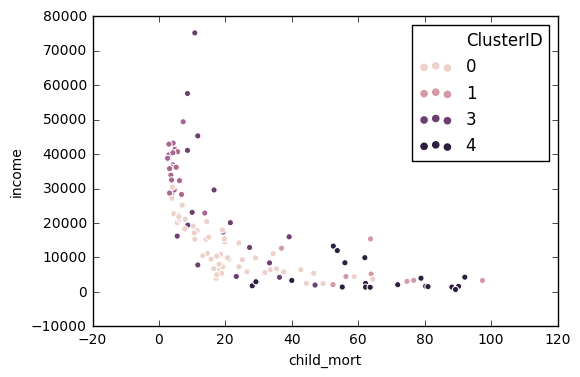

In [197]:
# Child-mortality and income
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'ClusterID', data = data6)

In [198]:
data6[data6['ClusterID']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
2,Antigua and Barbuda,10.3,45.500,58.9000,6.03,19100,1.440,76.8,2.13,12200,0
3,Armenia,18.1,20.800,45.3000,4.40,6700,7.770,73.3,1.69,3220,0
9,Bangladesh,49.4,16.000,21.8000,3.52,2440,7.140,70.4,2.33,758,0
10,Barbados,14.2,39.500,48.7000,7.97,15300,0.321,76.7,1.78,16000,0
12,Belize,18.8,58.200,57.5000,5.20,7880,1.140,71.4,2.71,4340,0
13,Bhutan,42.7,42.500,70.7000,5.20,6420,5.990,72.1,2.38,2180,0
14,Bolivia,46.6,41.200,34.3000,4.84,5410,8.780,71.6,3.20,1980,0
16,Brazil,19.8,10.700,11.8000,9.01,14500,8.410,74.2,1.80,11200,0
17,Bulgaria,10.8,50.200,53.0000,6.87,15300,1.110,73.9,1.57,6840,0
18,Cambodia,44.4,54.100,59.5000,5.68,2520,3.120,66.1,2.88,786,0


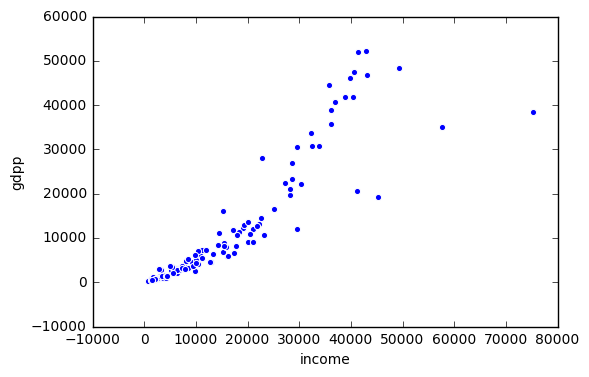

In [199]:
sns.scatterplot(x= 'income', y = 'gdpp', data = data6)

### Observations : It is observed that cluster 2 and 4 have pretty low values of the 4 indicators. Hence these are the countries that we need to focus. 

## Hierarchical Clustering

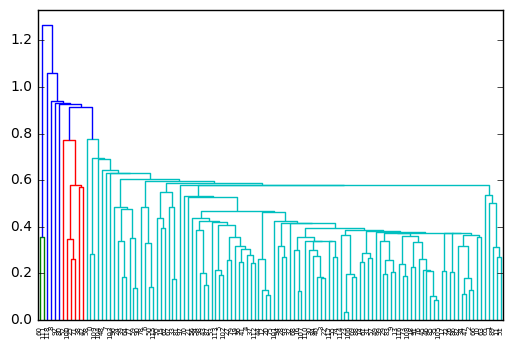

In [200]:
cluster_mergings = linkage(data3_1, method = "single", metric = "euclidean")
dendrogram(cluster_mergings)
plt.show()

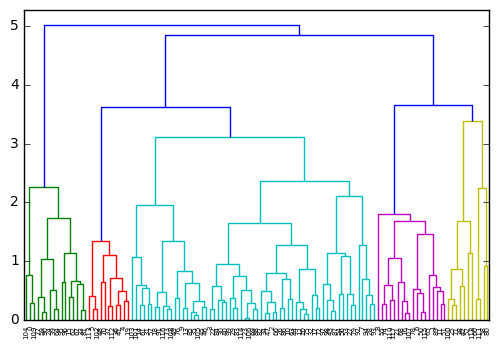

In [201]:
cluster_mergings = linkage(data3_1, method = "complete", metric = "euclidean")
dendrogram(cluster_mergings)
plt.show()

In [202]:
# Lets eliminate the barriers
cluster_cut = pd.Series(cut_tree(cluster_mergings, n_clusters = 5).reshape(-1,)) 
data4_cluster = pd.concat([data3,cluster_cut], axis=1)
data4_cluster.columns = ['PCA1', 'PCA2','PCA3','country','ClusterID']

In [203]:
data4_cluster.head()

,PCA1,PCA2,PCA3,country,ClusterID
0,-2.637442,1.469038,-0.541359,Afghanistan,0
1,-0.457626,-0.673301,0.961867,Algeria,1
2,0.649849,-1.024374,-0.250103,Antigua and Barbuda,2
3,-0.332692,-1.274517,0.176636,Armenia,2
4,3.180362,-0.250785,-0.116877,Australia,3


In [204]:
data7 = pd.merge(country_data,data4_cluster, on = 'country')
data8 = data7[['country', 'child_mort','exports','imports','health','income','inflation','life_expec',
               'total_fer','gdpp','ClusterID']]
data8.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,44.9,7.58,1610,9.44,56.2,5.82,553,0
1,Algeria,27.3,38.4,31.4,4.17,12900,16.10,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,45.5,58.9,6.03,19100,1.44,76.8,2.13,12200,2
3,Armenia,18.1,20.8,45.3,4.40,6700,7.77,73.3,1.69,3220,2
4,Australia,4.8,19.8,20.9,8.73,41400,1.16,82.0,1.93,51900,3


In [205]:
data8['ClusterID'].value_counts()

2    63
1    18
0    16
4    11
3    11
Name: ClusterID, dtype: int64

In [206]:
# Cluster 4 and 3 does not have enough good amount of clusters. Lets check on other clusters
data8[data8['ClusterID']==2]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
2,Antigua and Barbuda,10.3,45.500,58.9000,6.03,19100,1.440,76.8,2.13,12200,2
3,Armenia,18.1,20.800,45.3000,4.40,6700,7.770,73.3,1.69,3220,2
7,Bahamas,13.8,35.000,43.7000,7.89,22900,-0.393,73.8,1.86,28000,2
9,Bangladesh,49.4,16.000,21.8000,3.52,2440,7.140,70.4,2.33,758,2
10,Barbados,14.2,39.500,48.7000,7.97,15300,0.321,76.7,1.78,16000,2
12,Belize,18.8,58.200,57.5000,5.20,7880,1.140,71.4,2.71,4340,2
13,Bhutan,42.7,42.500,70.7000,5.20,6420,5.990,72.1,2.38,2180,2
14,Bolivia,46.6,41.200,34.3000,4.84,5410,8.780,71.6,3.20,1980,2
17,Bulgaria,10.8,50.200,53.0000,6.87,15300,1.110,73.9,1.57,6840,2
18,Cambodia,44.4,54.100,59.5000,5.68,2520,3.120,66.1,2.88,786,2


In [221]:
data8[data8['ClusterID']==1]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Algeria,27.3,38.40,31.4,4.17,12900,16.10,76.5,2.89,4460,1
6,Azerbaijan,39.2,54.30,20.7,5.88,16000,13.80,69.1,1.92,5840,1
8,Bahrain,8.6,69.50,50.9,4.97,41100,7.44,76.0,2.16,20700,1
11,Belarus,5.5,51.40,64.5,5.61,16200,15.10,70.4,1.49,6030,1
16,Brazil,19.8,10.70,11.8,9.01,14500,8.41,74.2,1.80,11200,1
21,Chile,8.7,37.70,31.3,7.96,19400,8.96,79.1,1.88,12900,1
50,Indonesia,33.3,24.30,22.4,2.61,8430,15.30,69.9,2.48,3110,1
51,Iran,19.3,24.40,19.4,5.60,17400,15.90,74.5,1.76,6530,1
55,Jamaica,18.1,31.30,49.6,4.81,8000,9.81,74.7,2.17,4680,1
65,Libya,16.6,65.60,42.1,3.88,29600,14.20,76.1,2.41,12100,1


In [208]:
data8[data8['ClusterID']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.00,44.9,7.58,1610,9.44,56.2,5.82,553,0
15,Botswana,52.5,43.60,51.3,8.30,13300,8.92,57.1,2.88,6350,0
24,Comoros,88.2,16.50,51.7,4.51,1410,3.87,65.9,4.75,769,0
33,Eritrea,55.2,4.79,23.3,2.66,1420,11.60,61.7,4.61,482,0
39,Gambia,80.3,23.80,42.7,5.69,1660,4.30,65.5,5.71,562,0
59,Kenya,62.2,20.70,33.6,4.75,2480,2.09,62.8,4.37,967,0
62,Lao,78.9,35.40,49.3,4.47,3980,9.20,63.8,3.15,1140,0
64,Liberia,89.3,19.10,92.6,11.80,700,5.47,60.8,5.02,327,0
67,Madagascar,62.2,25.00,43.0,3.77,1390,8.79,60.8,4.60,413,0
77,Namibia,56.0,47.80,60.7,6.78,8460,3.56,58.6,3.60,5190,0


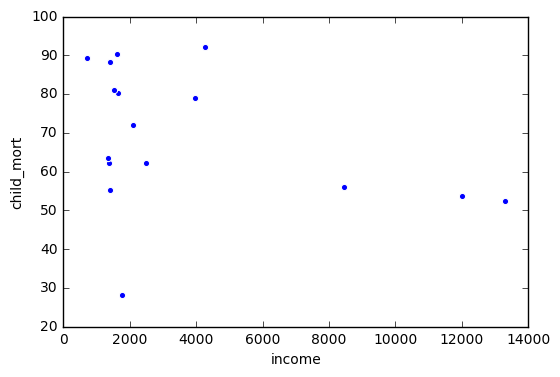

In [222]:
data9 = data8[data8['ClusterID'] ==0]
sns.scatterplot(x = 'income', y = 'child_mort', data = data9)

#### Result: From K-means clustering we analyse that cluster 2 and 4 might be the one which has a proper need of aid. While from Hierarchical Clustering  we found that cluster 0 and 1 is more appropriate.

## Final List of Countries

In [210]:
# initial file
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [211]:
# Again converting exports,imports and health spending percentages to absolute values.
country_data['exports'] = country_data['exports']*country_data['gdpp']/100
country_data['imports'] = country_data['imports']*country_data['gdpp']/100
country_data['health'] = country_data['health']*country_data['gdpp']/100

In [212]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [213]:
# Using the Binning method with GDPP to see the list of countries which are important
# The upper limit we got from the clustering was 1700
final_data = country_data[country_data['gdpp']<=1700]
final_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30000,41.9174,248.297000,1610,9.440,56.2,5.82,553
12,Bangladesh,49.4,121.28000,26.6816,165.244000,2440,7.140,70.4,2.33,758
17,Benin,111.0,180.40400,31.0780,281.976000,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.40000,38.7550,170.200000,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.60520,26.7960,90.552000,764,12.300,57.7,6.26,231
27,Cambodia,44.4,425.22600,44.6448,467.670000,2520,3.120,66.1,2.88,786
28,Cameroon,108.0,290.82000,67.2030,353.700000,2660,1.910,57.3,5.11,1310
31,Central African Republic,149.0,52.62800,17.7508,118.190000,888,2.010,47.5,5.21,446
32,Chad,150.0,330.09600,40.6341,390.195000,1930,6.390,56.5,6.59,897
36,Comoros,88.2,126.88500,34.6819,397.573000,1410,3.870,65.9,4.75,769


In [214]:
len(final_data)

48

In [215]:
# There are 48 countries.
final_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,84.808333,242.988282,53.166544,389.688794,2209.229167,8.849688,60.789583,4.552500,847.583333
std,37.864382,208.411190,36.338142,306.718665,1134.428833,5.849055,7.282776,1.382764,384.444824
min,17.200000,1.076920,12.821200,0.651092,609.000000,0.885000,32.100000,1.270000,231.000000
25%,61.350000,101.630250,31.079500,175.909500,1390.000000,4.080000,57.175000,3.465000,551.500000
50%,82.050000,150.912000,44.388600,280.956000,1900.000000,8.215000,61.250000,4.875000,758.000000
75%,108.250000,388.087500,60.501250,450.765000,2857.500000,12.150000,66.125000,5.370000,1205.000000
max,208.000000,943.200000,190.710000,1279.550000,4490.000000,23.600000,73.100000,7.490000,1630.000000


In [216]:
# From Clustering we got child mortality to be at least 76.
#Checking the number of countries in that range.
len(final_data[final_data['child_mort']>=76])

28

In [217]:
#There are 28 countries. Now taking the income column. Around 3200 was the income mean.
final_data2=final_data[final_data['child_mort']>=76]
final_data3=final_data2[final_data2['income']<3200]
len(final_data3)

23

In [218]:
# We got 23 countries.

In [219]:
final_data3.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,113.743478,165.144704,41.870378,292.629174,1444.913043,7.125435,56.065217,5.463478,627.173913
std,30.255681,140.898936,23.154120,222.532254,587.515796,5.428622,6.853042,0.953232,288.989407
min,80.300000,20.605200,17.750800,90.552000,609.000000,0.885000,32.100000,3.300000,231.000000
25%,90.400000,79.379500,30.663050,170.185000,974.000000,3.420000,55.300000,5.080000,432.500000
50%,109.000000,126.885000,37.332000,248.297000,1410.000000,5.450000,57.300000,5.340000,562.000000
75%,119.500000,188.290000,46.119600,328.251000,1740.000000,10.020000,58.750000,6.010000,733.000000
max,208.000000,617.320000,129.870000,1181.700000,2690.000000,20.800000,65.900000,7.490000,1310.000000


In [224]:
# Therefore the countries which require aid are
final_data3

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334
40,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690,5.390,56.3,5.27,1220
